Import all modules, read in and preview the dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
from matplotlib.pyplot import figure
matplotlib.rcParams["figure.figsize"] = (12,8)
warnings.filterwarnings('ignore')
plt.style.use("seaborn")

In [2]:
dataframe = pd.read_csv("../dataset/movies.csv")
dataframe.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Data Processing
Before we can move onto to our exploratory data analysis we need to process our dataset to prevent any issues with different functions we'll apply later. This includes data cleaning and data wrangling. Firstly, lets analyze the data types for each column to make sure they all have the correct data type to match the column uses respectively.

In [3]:
dataframe = dataframe.fillna(0)
dataframe.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

As we can see, all the data types seem to be correct, the only conversions we will be making are for the "Budget" and "Gross" columns, this is because the both carry values of millions in float format so converting this float to a 64-bit integer will help remove the point zero tha comes with floats and this will help with redability.

In [4]:
dataframe['budget'] = dataframe['budget'].astype("int64")
dataframe['gross'] = dataframe['gross'].astype("int64")

Missing values

In [5]:
dataframe.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

The next issue that I have identified is in the year column. Some of the "Year" column values do not match their actual year in the "Released" column which they are meant to be extracted from. To fix this I will extract the "yyyy" from the date in the "Released column and this should reference the accurate year. Here's an observation, the dates in the Released column are actually frormated as "month/day/year(country)" and now because of the country string, normal datetime conversion functions won't work. So, the method I have chosen to use is by simply splitting the string from the date and then extracting the year("yyyy") digits afterwards.

In [6]:
dataframe['year'] = dataframe['released'].str.split("(", 2).str[-2]
dataframe['year'] = dataframe['year'].str.split(",").str[1]
dataframe.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


Now it seems that the data has been processed and is now ready for some analysis.

### Exploratory Data Analysis

In order to get a bit of a feel for the dataset we're simply going to group each film by year and analze how budget and gross revenue has been increasing or decreasing with each year. We will plot bar graphs which will make it easy for us to accurately see any growth or decline over the years. But first, we need to look at any correlation between the different numeric columns and then we'll look deeper into the highly correlated columns, to do this we will use a correlation heatmap.

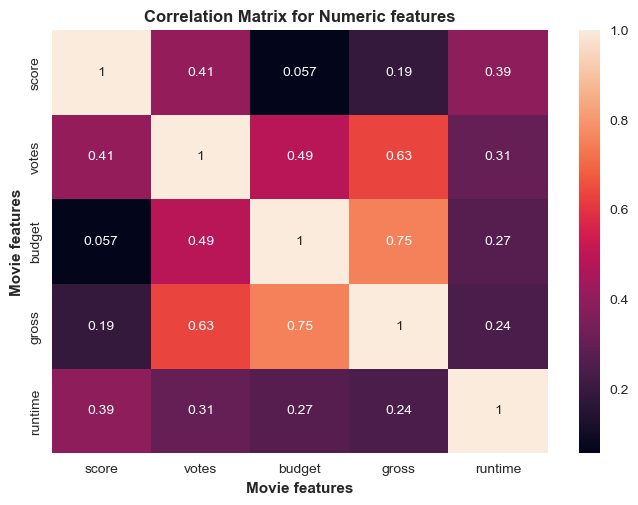

In [7]:
correlation_matrix = dataframe.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric features", weight='bold')
plt.xlabel("Movie features", weight='bold')
plt.ylabel("Movie features", weight='bold')
plt.show()

- In the heatmap we can see different relationships and how well they are correlated.
- "Budget vs Score" is definetely not correlated at all with 0.0 correlation.
- The strongest relationships we have here are "Gross vs Votes" and "Gross vs Budget" with 0.63 and 0.75 respectively
- "Budget vs Votes" comes in third with 0.49 which is still correlated but not strong enough for me to see need to further analyze that relationship.

Now that we have seen which relationships seem very strongly correlated, we can dive deeper and analyze them individually. But first lets take alook at the general Gross vs Budget relationship with a scatter plot.

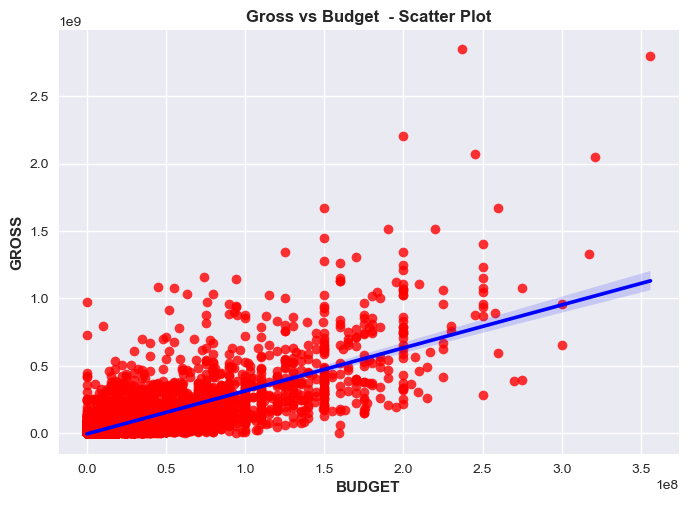

In [8]:
sns.regplot(x='budget', y='gross', data=dataframe, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.title("Gross vs Budget  - Scatter Plot", weight='bold')
plt.xlabel("BUDGET", weight='bold')
plt.ylabel("GROSS", weight='bold')
plt.show()

- This scatter plot confirms our correlation heatmap values

Now, to accurately investigate these relationships we need to look at the total for each column in each year and compare those totals to eachother, we start by looking at the total gross revenue per year

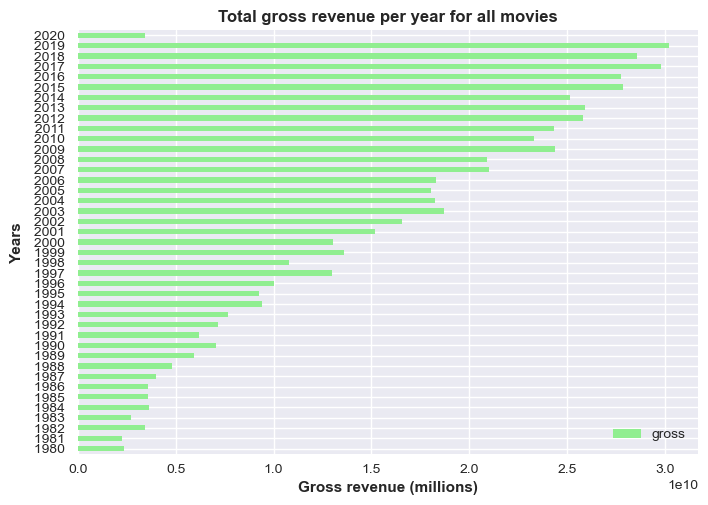

In [9]:
totals_df = dataframe.groupby(dataframe['year']).sum()
ax1 = totals_df.reset_index().plot.barh(x='year', y='gross', color='#90EE90')
ax1.set_xlabel("Gross revenue (millions)", weight="bold")
ax1.set_ylabel("Years", weight="bold")
ax1.set_title("Total gross revenue per year for all movies", weight="bold")
plt.show()

- Taking a look at the graph, we can see a very positive trend which shows that overall the gross revenue of movies is increasing. The lowest gross years have been 1980 and 1981, whereas the highest gross years were 2019 and 2017 which tells us that there has been large growth over the years which is good. 
- We do have one exceptiom which is 2020 that saw a decline so bad that makes 2020 one of the bottom 5 lowest grossing years. This could be because of a global pandemic that the world faced in 2020.
- One noticeable trend in the graph is that after we see growth in gross revenue for a year, the next year has a slight decline in gross revenue, then the following year after that increases again following the trend and this happens over and over again.
- Overall the trend has been great and constantly moving positively, the focus would be to see how this trend behaves after 2020, we could see an aggresive comeback or a ruined trend which never recovers.

Next, we need to see if there is any correlation between the amount spent on budget and the actual gross which is returned. We start by plotting total budget vs gross revenue on the same axis as a stacked bar graph to see any trends and the relationship between budget and gross.

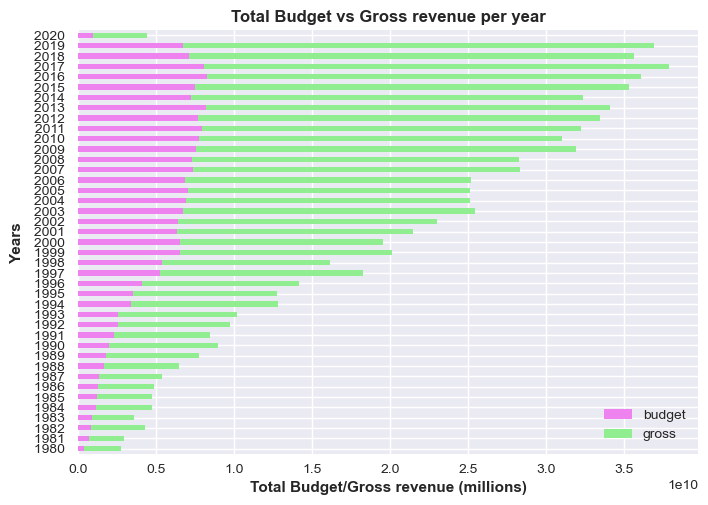

In [10]:
ax2 = totals_df[['budget', 'gross']].plot(kind="barh", stacked=True, color=['violet','#90EE90'])
ax2.set_xlabel("Total Budget/Gross revenue (millions)", weight="bold")
ax2.set_ylabel("Years", weight="bold")
ax2.set_title("Total Budget vs Gross revenue per year", weight="bold")
plt.show()

In [11]:
print("Correlation =", totals_df['budget'].corr(totals_df['gross']))

Correlation = 0.937307356140756


- In this graph, we can now see how budget influences the gross revenue that a movie produces, as per our prior trend the budget for movies has been positvely increasing across the years overall.
- Although, in this relationship we do not see a direct surge in gross with a higher budget. We can see this in 2017 where we had the  highest gross year but it was not the highest budget year so it tells us that there are also other factors that drive an increase in gross revenue.
- Below the graph we can also see that there is a correlation of 0.9 which is a strongly positive correlation, this confirms the relationship that we see in this graph.
- The higher the budget the higher the gross that is returned and the opposite is true.

Taking a look at how different genres perfrom in terms of total gross and budget

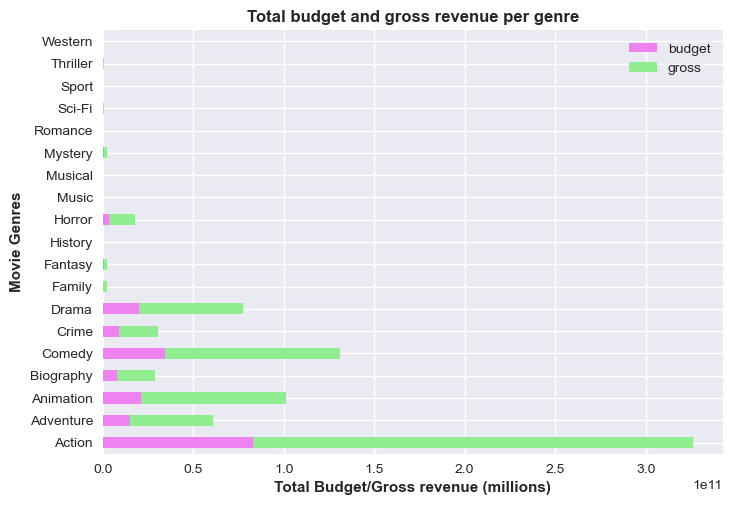

In [12]:
genre_df = dataframe.groupby(dataframe['genre']).sum()
ax3 = genre_df[['budget', 'gross']].plot(kind="barh", stacked=True, color=['violet','#90EE90'])
ax3.set_xlabel("Total Budget/Gross revenue (millions)", weight="bold")
ax3.set_ylabel("Movie Genres", weight="bold")
ax3.set_title("Total budget and gross revenue per genre", weight="bold")
plt.show()


In [13]:
print("Correlation =", genre_df['budget'].corr(genre_df['gross']))

Correlation = 0.9969065723673904


- The action genre is a very clear leader in generating gross revenue, it is clearly a fan favorite and has generated more than double the gross revenue of the second best genre which is comedy.
- The top 5 genres in terms of gross are Action, Comedy, Animation, Drama and Adventure.
- Budget still seems to be closely correlated with gross because we can see the relationship between them by the higher the budget has been in the top five genres, the higher their gross has been.
- Again, below the graph we can also see that there is still a correlation of 0.9 which is a strongly positive correlation, this confirms the relationship that we see in this graph.
- The higher the budget the higher the gross that is returned and the opposite is true.

We've seen how well the top genres have done in terms of gross, but to see if the customers are getting value for their lets analyze the average ratings that these genres get and see if there are any insights we can draw.

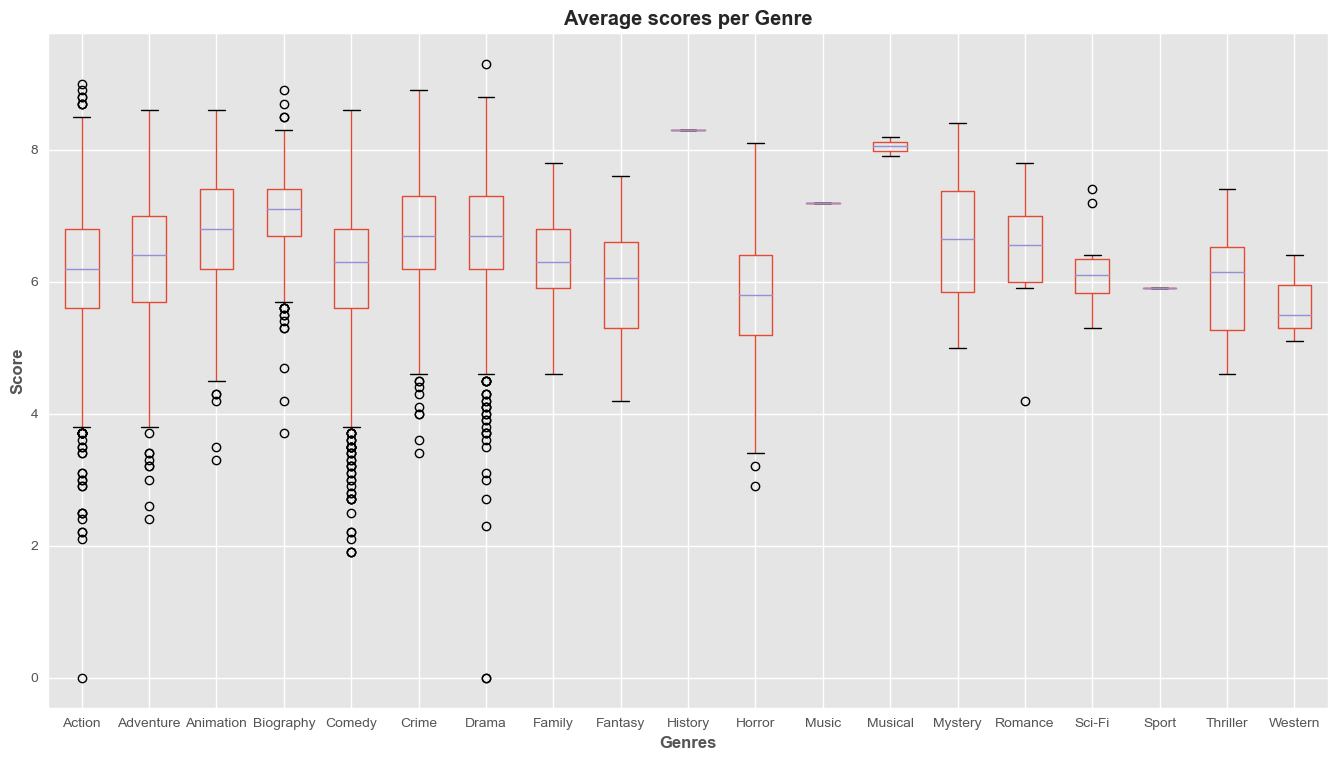

In [14]:
plt.style.use("ggplot")
boxplot = dataframe.boxplot(column='score', by='genre', figsize=(16,9))
boxplot.set_title('Average scores per Genre',fontweight='bold')
boxplot.set_xlabel('Genres', fontweight='bold')
boxplot.set_ylabel('Score', fontweight='bold')
plt.suptitle('')
plt.show()

- Suprisingly, Crime actually has the highest rating which doesn't reflect in its gross revenue.
- Action and Adventure hold strong having zero to little skewedness and great average rating, their max ratings are also both part of the highest ratings overall.
- History, Music, Sci-FI, Romance, Sport and Western all had the worst measures of central tendancy which indicates bad rating performacne.
- Horror had the lowest ratings and suprisingly again Action and Adventure also had the lowest ratings.

Now that we have seen how gross and budget are affected by genre and year, let's further analyze the performance in terms of runtime and see what effect this has on the overall performance.

In [15]:
print("The overall mean is =", np.mean(totals_df['runtime']))
print("The overall median is =", np.median(totals_df['runtime']))

The overall mean is = 19906.926829268294
The overall median is = 21162.0


Movie with the highest runtime

In [16]:
dataframe.loc[dataframe['runtime'] == dataframe['runtime'].max()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
4396,The Best of Youth,R,Drama,2003,"June 20, 2003 (Italy)",8.5,21000.0,Marco Tullio Giordana,Sandro Petraglia,Luigi Lo Cascio,Italy,0,2799773,BiBi Film,366.0


Movies with the lowest runtime

In [17]:
dataframe.dropna().loc[dataframe['runtime'] == dataframe['runtime'].min()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6195,One for the Money,PG-13,Action,2012,"January 27, 2012 (United States)",5.3,41000.0,Julie Anne Robinson,Stacy Sherman,Katherine Heigl,United States,40000000,38084162,Lakeshore Entertainment,0.0
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0
